# Numpy programming examples

Here's a function that can't cope with arrays:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
%matplotlib inline
#
def ToFermiBad(RA):
    '''
    Takes coordinate in range -180...180 degrees and returns equivalent coordinate in range
    0...360 degrees. Can cope with arrays.
    '''
    nRA = len(RA)
    addRA = 360.0*(math.sin(RA) < 0.0)
    RAnew = RA + addRA
    return RAnew
#
coord = np.array([-90.0, -85.0])
print(f"ToFermiBad({coord}) = {ToFermiBad(coord)}")

TypeError: only size-1 arrays can be converted to Python scalars

Fix the `math` problem, so can use arrays.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
#
def ToFermiBad(RA):
    '''
    Takes coordinate in range -180...180 degrees and returns equivalent coordinate in range
    0...360 degrees. Can cope with arrays.
    '''
    nRA = len(RA)
    addRA = 360.0*(np.sin(RA) < 0.0)
    RAnew = RA + addRA
    return RAnew
#
coord = np.array([-90.0, -85.0])
print(f"ToFermiBad({coord}) = {ToFermiBad(coord)}")

ToFermiBad([-90. -85.]) = [270. -85.]


But is not able to cope with numbers where arrays are expected.

In [3]:
def ToFermiBad(RA):
    '''
    Takes coordinate in range -180...180 degrees and returns equivalent coordinate in range
    0...360 degrees. Can cope with arrays.
    '''
    nRA = len(RA)
    addRA = 360.0*(np.sin(RA) < 0.0)
    RAnew = RA + addRA
    return RAnew
#
coord = -90.0
print(f"ToFermiBad({coord}) = {ToFermiBad(coord)}")

TypeError: object of type 'float' has no len()

This is the same function, modified so it doesn't fail when arrays are replaced by numbers.

In [4]:
def ToFermi(RA):
    '''
    Takes coordinate in range -180...180 degrees and returns equivalent coordinate in range
    0...360 degrees. Can cope with arrays.
    '''
    nRA = len(np.atleast_1d(RA))
    addRA = 360.0*(np.sin(RA) < 0.0)
    RAnew = RA + addRA
    return RAnew
#
coord = -90.0
print(f"ToFermi({coord}) = {ToFermi(coord)}")

ToFermi(-90.0) = 270.0


## Timing comparison

The routines belows allow comparison of speed of numpy and "normal" Python routines in the context of the analysis of a physics dataset.  

In [5]:
def angSep(alpA, delA, alpB, delB):
    '''
    Takes longitude and latitude coordinates of two points (degrees)
    and returns their angular separation (radians)
    '''
    piH = np.pi/2
    dTr = np.pi/180
    gam = np.arccos(np.cos(piH - delA*dTr)*np.cos(piH - delB*dTr) + 
                    np.sin(piH - delA*dTr)*np.sin(piH - delB*dTr)*
                    np.cos(alpA*dTr - alpB*dTr))
    return gam

This is the numpy version.

In [6]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
import os 
import subprocess
#
from pathlib import Path
#
OutAllArray = "D:\\FermiData\\analysis\\FermiSkyArr-Galactic-HE.txt"
print(" ")
print("Numpy photon file (OutAllArray)",OutAllArray)
#
SourceName = "AllSky"
RA = 0.0
Dec = 0.0
RadRoI = 180.0
print(" ")
Coords = "Galactic"
print("Coordinate system used {:.10s} ".format(Coords))
#
print("Source is ",SourceName)
print("Location is RA {:.5f}, Dec {:.5f}.".format(RA,Dec))
print("Radius of RoI: {:.5f}.".format(RadRoI))
Emin = 3000
Emax = 300000
print(" ")
print("Minimum and maximum photon energies: {:.0f}, {:.0f}.".format(Emin,Emax))
#
# Set nPhotonsMax to small value if required (for testing purposes), otherwise something big!
nPhotonsMax = 999999999
# nPhotonsMax = 99999
#
Fout = Path(OutAllArray)
if Fout.is_file():
    print(" ")
    print("Numpy array exists; load",OutAllArray)
    arrPhotonsIn = np.loadtxt(OutAllArray,delimiter = ',',usecols = (0, 1, 2))
    nPhotonsFile = len(arrPhotonsIn)
    nPhotonsMax = min(nPhotonsFile, nPhotonsMax)
    print("Number of photons in photon file",nPhotonsFile)
    print("Max. number of photons set to",nPhotonsMax)
    begin = datetime.datetime.now()
    selectNumber = np.concatenate((True*np.ones(nPhotonsMax),
                                   False*np.ones(nPhotonsFile - nPhotonsMax)))
    print("Sum of selectNumber",np.sum(selectNumber))
    #
    # Select on energy
    selectEnergy = np.logical_and(arrPhotonsIn[:,0] > Emin, arrPhotonsIn[:,0] < Emax)
    print("Sum of selectEnergy",np.sum(selectEnergy))
    #
    # Select on angular separation
    rGamma = angSep(RA, Dec, arrPhotonsIn[:,1], arrPhotonsIn[:,2])
    selectRoI = rGamma < np.pi*RadRoI/180
    print("Sum of selectRoI",np.sum(selectRoI))
    #
    # Put all selection criteria together
    selectAll = (np.logical_and(selectEnergy, selectRoI))
    print("Sum of selectAll before number restriction",np.sum(selectAll))
    selectAll = np.logical_and(selectAll, selectNumber)
    print("Sum of selectAll after all selections",np.sum(selectAll))
    #
    # Produce array for analysis here
    arrPhotons = arrPhotonsIn[selectAll,:]
    nPhotons = len(arrPhotons)
    end = datetime.datetime.now()
else:
    print("Numpy array does not exist")
    nPhotons = 0
#
print("nPhotons is",nPhotons)
#
print(" ")
print("Time for loop execution is",str(end - begin))
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time 2019-11-18 14:33:07.151032
 
Numpy photon file (OutAllArray) D:\FermiData\analysis\FermiSkyArr-Galactic-HE.txt
 
Coordinate system used Galactic 
Source is  AllSky
Location is RA 0.00000, Dec 0.00000.
Radius of RoI: 180.00000.
 
Minimum and maximum photon energies: 3000, 300000.
 
Numpy array exists; load D:\FermiData\analysis\FermiSkyArr-Galactic-HE.txt
Number of photons in photon file 1101865
Max. number of photons set to 1101865
Sum of selectNumber 1101865.0
Sum of selectEnergy 1101865
Sum of selectRoI 1101865
Sum of selectAll before number restriction 1101865
Sum of selectAll after all selections 1101865
nPhotons is 1101865
 
Time for loop execution is 0:00:00.342339
 
Date and time 2019-11-18 14:33:29.041787
Time since last check is 0:00:21.890755


And this is the version using a `for` loop to do the same thing.

In [7]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
import os 
import subprocess
#
from pathlib import Path
#
OutAllArray = "D:\\FermiData\\analysis\\FermiSkyArr-Galactic-HE.txt"
print(" ")
print("Numpy photon file (OutAllArray)",OutAllArray)
#
SourceName = "AllSky"
RA = 0.0
Dec = 0.0
RadRoI = 180.0
print(" ")
Coords = "Galactic"
print("Coordinate system used {:.10s} ".format(Coords))
#
print("Source is ",SourceName)
print("Location is RA {:.5f}, Dec {:.5f}.".format(RA,Dec))
print("Radius of RoI: {:.5f}.".format(RadRoI))
Emin = 3000
Emax = 300000
print(" ")
print("Minimum and maximum photon energies: {:.0f}, {:.0f}.".format(Emin,Emax))
#
# Set nPhotonsMax to small value if required (for testing purposes), otherwise something big!
nPhotonsMax = 999999999
# nPhotonsMax = 99999
#
Fout = Path(OutAllArray)
if Fout.is_file():
    print(" ")
    print("Numpy array exists; load",OutAllArray)
    arrPhotonsIn = np.loadtxt(OutAllArray,delimiter = ',',usecols = (0, 1, 2))
    nPhotonsFile = len(arrPhotonsIn)
    nPhotonsMax = min(nPhotonsFile, nPhotonsMax)
    print("Number of photons in photon file",nPhotonsFile)
    print("Max. number of photons set to",nPhotonsMax)
    begin = datetime.datetime.now()
    nPhotons = 0
    for nPhot in range(0, nPhotonsFile):
        #
        # Select on energy
        if arrPhotonsIn[nPhot,0] < Emin or arrPhotonsIn[nPhot,0] > Emax:
            continue
        #
        # Select on angular separation
        if angSep(RA, Dec, arrPhotonsIn[nPhot,1], arrPhotonsIn[nPhot,2]) > np.pi*RadRoI/180:
            continue
        #
        # Keep this photon!
        arrPhotons[nPhotons, :] = arrPhotonsIn[nPhotons, :]
        #
        nPhotons += 1
        if nPhotons > nPhotonsMax:
            break
        #
    end = datetime.datetime.now()
    #
else:
    print("Numpy array does not exist")
    nPhotons = 0
#
print("nPhotons is",nPhotons)
#
print(" ")
print("Time for loop execution is",str(end - begin))
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time 2019-11-18 14:34:02.768767
 
Numpy photon file (OutAllArray) D:\FermiData\analysis\FermiSkyArr-Galactic-HE.txt
 
Coordinate system used Galactic 
Source is  AllSky
Location is RA 0.00000, Dec 0.00000.
Radius of RoI: 180.00000.
 
Minimum and maximum photon energies: 3000, 300000.
 
Numpy array exists; load D:\FermiData\analysis\FermiSkyArr-Galactic-HE.txt
Number of photons in photon file 1101865
Max. number of photons set to 1101865
nPhotons is 1101865
 
Time for loop execution is 0:00:28.972652
 
Date and time 2019-11-18 14:34:52.186729
Time since last check is 0:00:49.417962


## Another example of slicing

Determining bin centres for histogram.

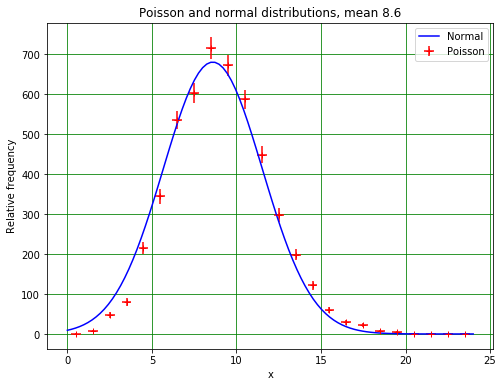

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#
nEvents = 5000
mu = 8.6
randPoisson = np.random.poisson(mu, nEvents)
nBins = 24
bot = 0.0
top = 24.0
binEdges = np.linspace(bot, top, nBins + 1)
binWidth = (top - bot)/nBins
binCentres = (binEdges[0:nBins] + binEdges[1:nBins + 1])/2
hist, bins = np.histogram(randPoisson, binEdges)
#
nLine = 100
xLine = np.linspace(bot, top, nLine)
yNormal = nEvents*binWidth/(np.sqrt(2*np.pi)*np.sqrt(mu))*np.exp(-0.5*(xLine - mu)**2/mu)
#
fig, ax = plt.subplots(figsize = (8, 6))
ax.set_title("Poisson and normal distributions, mean " + str(mu))
ax.set_xlabel("x")
ax.set_ylabel("Relative frequency")
ax.errorbar(binCentres, hist, xerr = binWidth/np.sqrt(12), yerr = np.sqrt(hist), 
            linestyle = '', marker = "+", color = "r", label = "Poisson")
ax.plot(xLine, yNormal, linestyle = '-', color = 'b', label = "Normal")
ax.grid(color = 'g')
ax.legend()
plt.show()